# This notebook is basic demonstration of data insights from a loan applicants dataset.
## like what is the approval ratio of  loan and which factors is most important to get your loan approved.
## At last we will create a predictive model which can predict that which applicant get loan

In [85]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

### Some of the Questions :

1. Find % of total applicants for each unique value of dependents (for data biasing)
2. Find the average number of dependents per applicant (dependant refers to family members)
3. Find the %of applications approved for self employed applicants
4. What is the % of rejections for married male applicants
5. Which property area has the maximum approval ratio
6. Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score



# Importing Data

In [86]:
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         dataset = os.path.join(dirname, filename)
#         print(os.path.join(dirname, filename))

data=pd.read_json("loan_data.json")

## Data has no null value

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
Application_ID        511 non-null object
Gender                511 non-null object
Married               511 non-null object
Dependents            511 non-null object
Education             511 non-null object
Self_Employed         511 non-null object
Credit_History        511 non-null int64
Property_Area         511 non-null object
Income                511 non-null object
Application_Status    511 non-null object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


In [88]:
data.tail()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y
510,LP002990,Female,No,0,Graduate,Yes,0,Semiurban,medium,N


# Plotting different features with respect to Application status(Approved or not)
## data insights

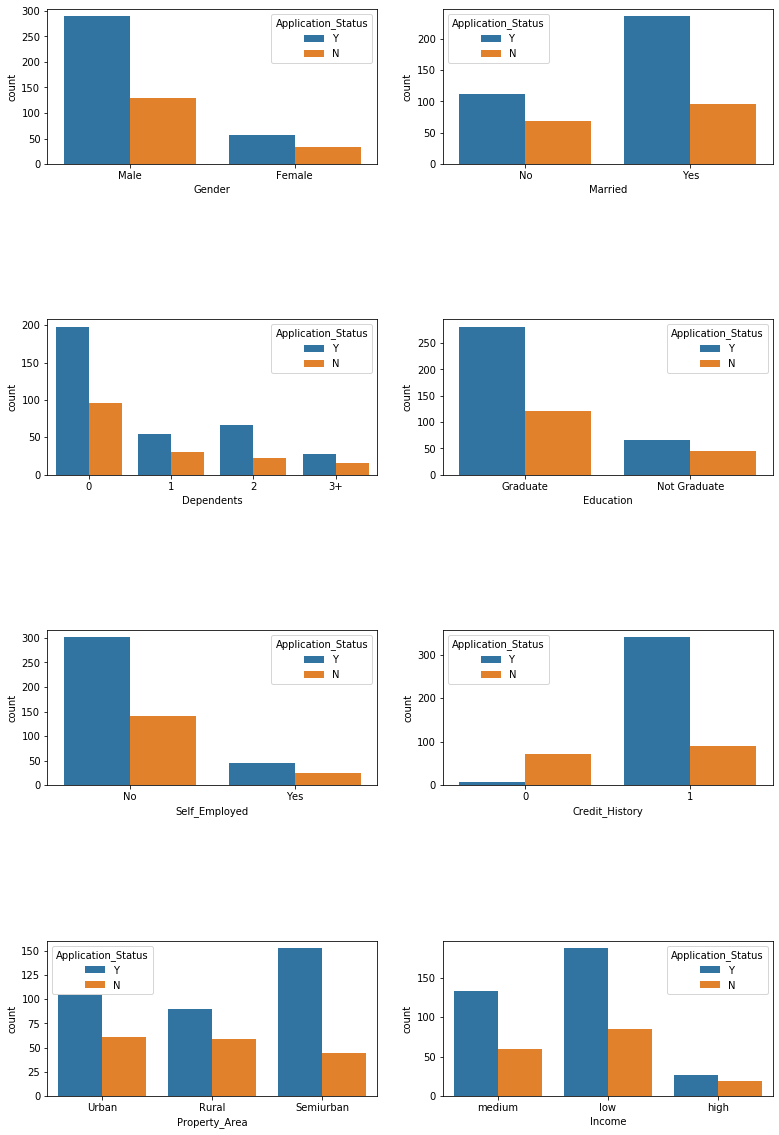

In [89]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(4,2,figsize=(13,20))
for id,i in enumerate(data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]):
    row,col = id//2,id%2
    sb.countplot(x=i,data=data,hue='Application_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

# Ques 1. Find % of total applicants for each unique value of dependents

## for the purpose to see how data is biased toward one type of category
## As you can see Maximum application filled are from 0 dependant 

In [90]:
l=data.groupby(data.Dependents)
l.count()

,Application_ID,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
Dependents,,,,,,,,,
0,294,294,294,294,294,294,294,294,294
1,85,85,85,85,85,85,85,85,85
2,88,88,88,88,88,88,88,88,88
3+,44,44,44,44,44,44,44,44,44


In [91]:
print(round(294/511*100),"% of total applicats are with 0 -dependents")
print(round(85/511*100),"% of total applicats are with 1 -dependents")    
print(round(88/511*100),"% of total applicats are with 2 -dependents")
print(round(44/511*100)," % of total applicats are with 3+ -dependents")

58 % of total applicats are with 0 -dependents
17 % of total applicats are with 1 -dependents
17 % of total applicats are with 2 -dependents
9  % of total applicats are with 3+ -dependents


# 3. Find the %of applications approved for self employed applicants
# 9% SELF EMPLOYED  candidates GETS THEIR loan APPROVED

In [92]:
data.groupby(['Self_Employed','Application_Status']).count()

Application_ID  Gender  Married  Dependents  \
Self_Employed Application_Status                                                
No            N                              140     140      140         140   
              Y                              301     301      301         301   
Yes           N                               24      24       24          24   
              Y                               46      46       46          46   

                                  Education  Credit_History  Property_Area  \
Self_Employed Application_Status                                             
No            N                         140             140            140   
              Y                         301             301            301   
Yes           N                          24              24             24   
              Y                          46              46             46   

                                  Income  
Self_Employed Application_Status          
No            N                      140  
              Y                      301  
Yes           N                       24  
              Y                       46

In [93]:
print(46/511*100)

9.001956947162427


# 4. What is the % of rejections for married male applicant
## 17% of married males are rejected for Loan approval

In [94]:
data.groupby(['Married','Gender','Application_Status']).count()

Application_ID  Dependents  Education  \
Married Gender Application_Status                                          
No      Female N                               26          26         26   
               Y                               40          40         40   
        Male   N                               43          43         43   
               Y                               71          71         71   
Yes     Female N                                8           8          8   
               Y                               17          17         17   
        Male   N                               87          87         87   
               Y                              219         219        219   

                                   Self_Employed  Credit_History  \
Married Gender Application_Status                                  
No      Female N                              26              26   
               Y                              40              40   
        Male   N                              43              43   
               Y                              71              71   
Yes     Female N                               8               8   
               Y                              17              17   
        Male   N                              87              87   
               Y                             219             219   

                                   Property_Area  Income  
Married Gender Application_Status                         
No      Female N                              26      26  
               Y                              40      40  
        Male   N                              43      43  
               Y                              71      71  
Yes     Female N                               8       8  
               Y                              17      17  
        Male   N                              87      87  
               Y                             219     219

In [95]:
print(87/511*100)

17.025440313111545


> Also chances of married male to get his loan approved is highest

# 5. Which property area has the maximum approval ratio
# = Semiurban

In [96]:
data.groupby(['Property_Area','Application_Status']).count()

Application_ID  Gender  Married  Dependents  \
Property_Area Application_Status                                                
Rural         N                               59      59       59          59   
              Y                               90      90       90          90   
Semiurban     N                               44      44       44          44   
              Y                              153     153      153         153   
Urban         N                               61      61       61          61   
              Y                              104     104      104         104   

                                  Education  Self_Employed  Credit_History  \
Property_Area Application_Status                                             
Rural         N                          59             59              59   
              Y                          90             90              90   
Semiurban     N                          44             44              44   
              Y                         153            153             153   
Urban         N                          61             61              61   
              Y                         104            104             104   

                                  Income  
Property_Area Application_Status          
Rural         N                       59  
              Y                       90  
Semiurban     N                       44  
              Y                      153  
Urban         N                       61  
              Y                      104

# Data insights on basis of dependents

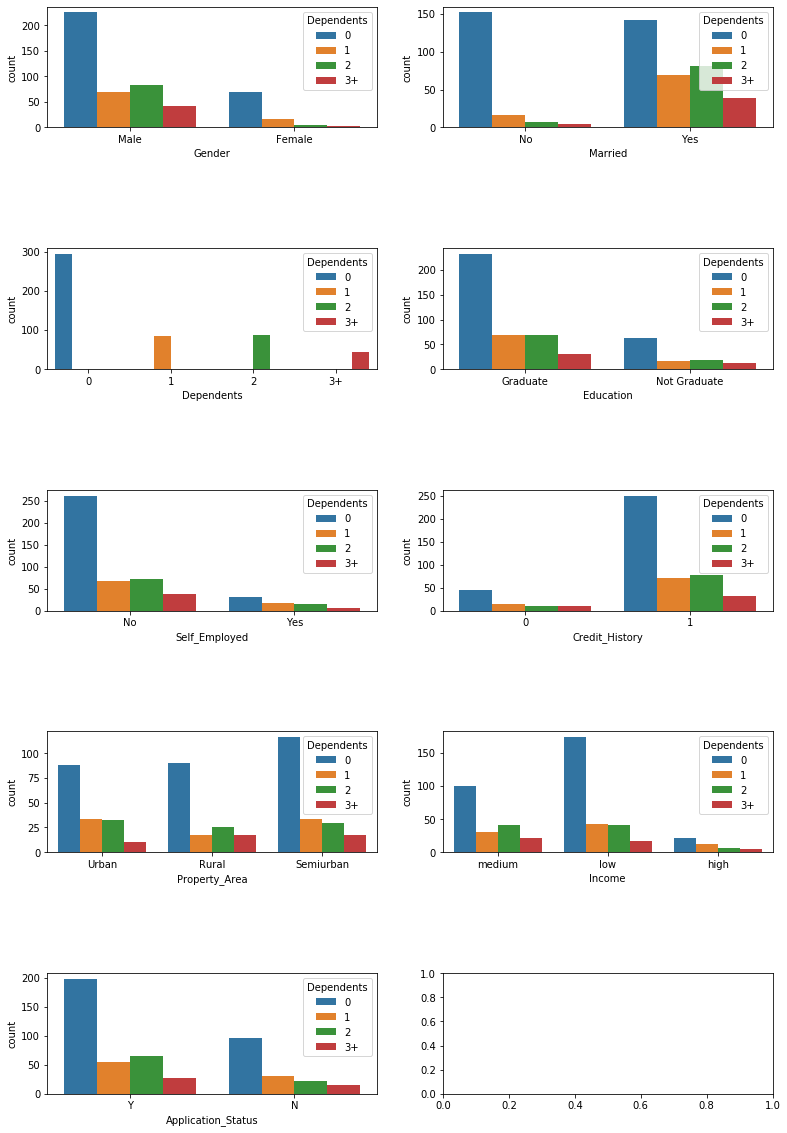

In [97]:
fig,axes = plt.subplots(5,2,figsize=(13,20))
for id,i in enumerate(data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income','Application_Status']]):
    row,col = id//2,id%2
    sb.countplot(x=i,data=data,hue='Dependents',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

# 6. Find average dependents per income group
## low salary applicant have 0 dependant 

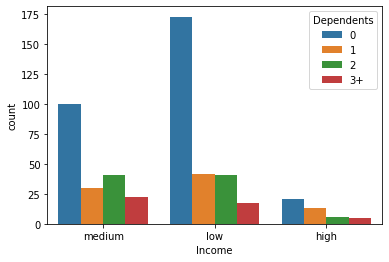

In [98]:
sb.countplot(hue=data.Dependents,x=data.Income)

In [99]:
data.groupby(['Income','Dependents']).count()
# Average no. of dependents in high income candidates is 

Application_ID  Gender  Married  Education  Self_Employed  \
Income Dependents                                                              
high   0                       21      21       21         21             21   
       1                       13      13       13         13             13   
       2                        6       6        6          6              6   
       3+                       5       5        5          5              5   
low    0                      173     173      173        173            173   
       1                       42      42       42         42             42   
       2                       41      41       41         41             41   
       3+                      17      17       17         17             17   
medium 0                      100     100      100        100            100   
       1                       30      30       30         30             30   
       2                       41      41       41         41             41   
       3+                      22      22       22         22             22   

                   Credit_History  Property_Area  Application_Status  
Income Dependents                                                     
high   0                       21             21                  21  
       1                       13             13                  13  
       2                        6              6                   6  
       3+                       5              5                   5  
low    0                      173            173                 173  
       1                       42             42                  42  
       2                       41             41                  41  
       3+                      17             17                  17  
medium 0                      100            100                 100  
       1                       30             30                  30  
       2                       41             41                  41  
       3+                      22             22                  22

# Max people applying for loan is of low income


In [100]:
data.groupby(['Income']).count() 

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Application_Status
Income,,,,,,,,,
high,45,45,45,45,45,45,45,45,45
low,273,273,273,273,273,273,273,273,273
medium,193,193,193,193,193,193,193,193,193


# Approval on basis of credit history:
## - applicants with a credit history have higher chance of approval.

In [101]:
data.groupby(['Application_Status','Credit_History']).count() 

Application_ID  Gender  Married  \
Application_Status Credit_History                                    
N                  0                           73      73       73   
                   1                           91      91       91   
Y                  0                            7       7        7   
                   1                          340     340      340   

                                   Dependents  Education  Self_Employed  \
Application_Status Credit_History                                         
N                  0                       73         73             73   
                   1                       91         91             91   
Y                  0                        7          7              7   
                   1                      340        340            340   

                                   Property_Area  Income  
Application_Status Credit_History                         
N                  0                          73      73  
                   1                          91      91  
Y                  0                           7       7  
                   1                         340     340

# 7.) Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score

In [102]:
data.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [103]:
data.drop(['Application_ID'],axis=1,inplace=True)

### convert the data to machine form

In [104]:
from sklearn.preprocessing import LabelEncoder
column=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Income','Application_Status']
all= LabelEncoder()
for i in column:
    data[i] = all.fit_transform(data[i])

In [105]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,1,0,0,0,0,1,2,2,1
1,1,1,1,0,0,1,0,2,0
2,1,1,0,0,1,1,2,1,1
3,1,1,0,1,0,1,2,1,1
4,1,0,0,0,0,1,2,2,1


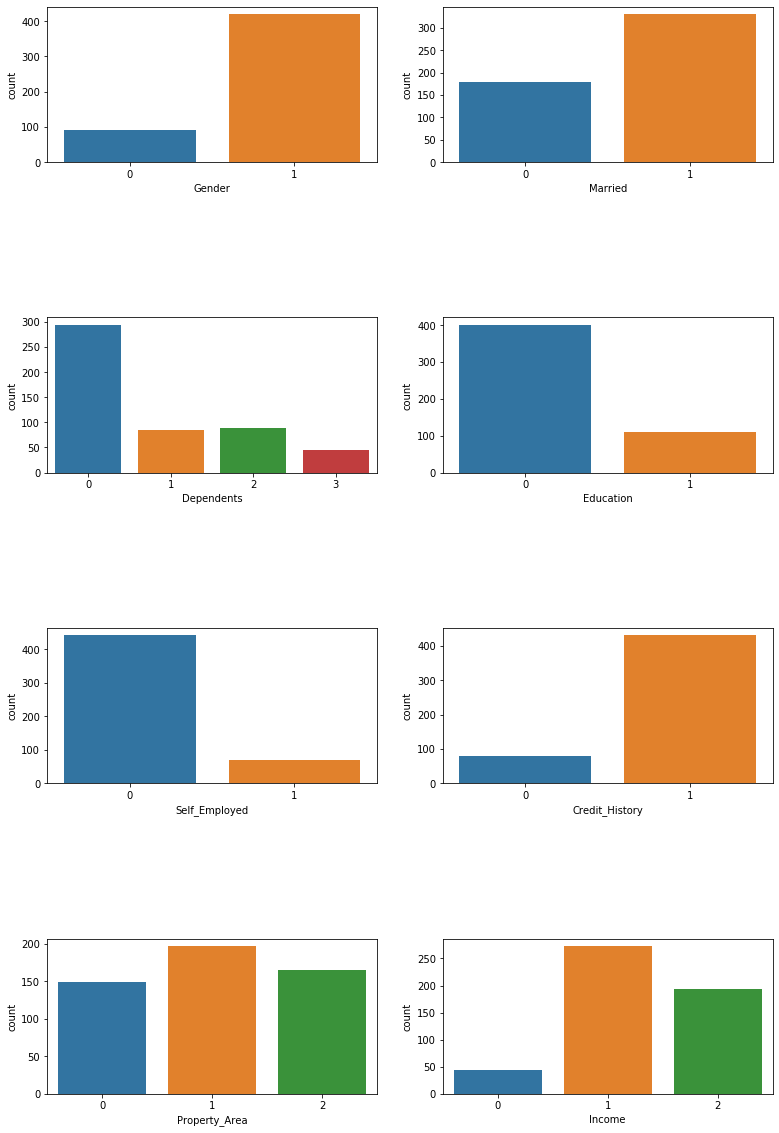

In [106]:

fig,axes = plt.subplots(4,2,figsize=(13,20))
for id,i in enumerate(data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]):
    row,col = id//2,id%2
    sb.countplot(x=i,data=data,ax=axes[row,col])
plt.subplots_adjust(hspace=1)

In [107]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Income', 'Application_Status'],
      dtype='object')

In [108]:
x=data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]
y=data.Application_Status
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.2, random_state=7)

In [109]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions)*100)

88.3495145631068


# accuracy=89 %

# Confusion Matrix

# 12 applicationn are wronglly accepted by our model
# they should not be accepted
## we need to decrease false negative 

In [110]:
from sklearn.metrics import confusion_matrix #confusuon matrix
pd.crosstab(y_test, predictions)
#positive=1 : application accepted

col_0,0,1
Application_Status,,
0,17,12
1,0,74


# heatmap to check co relation between attributes
## credit history is  highly co-related 

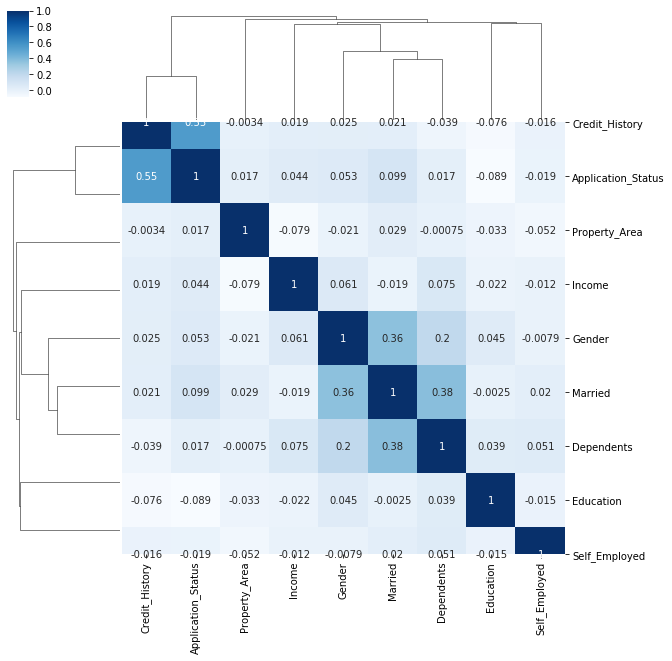

In [111]:
sb.clustermap(data.corr(),cmap='Blues',annot=True)
#credit history is correlated with application status

# other models

In [112]:
X_train=data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]
Y_train=data.Application_Status

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3,
                                                    random_state=10)

In [113]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, Y_train)
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, Y_train)
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, Y_train)
# Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 1)
classifier4.fit(X_train, Y_train)
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, Y_train)
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier6.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [114]:
Y_pred1 = classifier1.predict(X_test)
Y_pred2 = classifier2.predict(X_test)
Y_pred3 = classifier3.predict(X_test)
Y_pred4 = classifier4.predict(X_test)
Y_pred5= classifier5.predict(X_test)
Y_pred6 = classifier6.predict(X_test)

In [115]:

print(accuracy_score(Y_test, Y_pred1))
print(accuracy_score(Y_test, Y_pred2))
print(accuracy_score(Y_test, Y_pred3))
print(accuracy_score(Y_test, Y_pred4))
print(accuracy_score(Y_test, Y_pred5))
print(accuracy_score(Y_test, Y_pred6))

0.8376623376623377
0.7727272727272727
0.8376623376623377
0.8376623376623377
0.8311688311688312
0.7337662337662337


### Logistic Regression did decent job in prediction

# Testing of our web <a href="https://loan5.herokuapp.com/">api</a> 

In [116]:
x =data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]
y = data.Application_Status

In [117]:
model = LogisticRegression(random_state = 0)
model.fit(x, y)
model.score(x,y)

0.8082191780821918

In [118]:
import pickle
pickle.dump(model, open('modell.pkl', 'wb'))

In [119]:
# url= 'http://127.0.0.1:5000/'
url= 'https://loan5.herokuapp.com/'

In [120]:
import json
import requests
# sample data
data={'Gender':1, 'Married':1, 'Dependents':2, 'Education':0, 'Self_Employed':1,'Credit_History':1,'Property_Area':1, 'Income':1}
data = json.dumps(data)

In [121]:
# test working
requests.post(url, data)

<Response [200]>

In [122]:
send_req = requests.post(url, data)
print(send_req)

<Response [200]>


In [123]:
print(send_req.json())

{'results': {'results': 1}}


In [6]:
import pickle
loaded_model = pickle.load(open("modell.pkl", "rb")) 
result = loaded_model.predict([[1,1,1,25,1,0,1,1]]) 
print(result[0])

0
